In [7]:
import numpy as np
import matplotlib.pyplot as plt

from qsopop import qlf

In [8]:
qlf1 = qlf.Schindler2023QLF()
qlf2 = qlf.Matsuoka2018QLF()

[INFO]---------------------------------------------------
[INFO] Performing initialization checks 
[INFO]---------------------------------------------------
[INFO]---------------------------------------------------
[INFO] Main parameter phi_star is described by a function.
[INFO] The function parameters are: ['redsh', 'log_phi_star_z6', 'k', 'z_ref']
[INFO] All parameters are supplied.
[INFO] Parameters "lum" and "redsh" were ignored as they are luminosity function arguments.
[INFO]---------------------------------------------------
[INFO] Main parameter lum_star is supplied as a normal parameter.
[INFO]---------------------------------------------------
[INFO] Main parameter alpha is supplied as a normal parameter.
[INFO]---------------------------------------------------
[INFO] Main parameter beta is supplied as a normal parameter.
[INFO]---------------------------------------------------
[INFO] Initialization check passed.
[INFO]---------------------------------------------------
[I

In [9]:
z = 6.0 # Redshift
M1450 = np.arange(-28, -22, 0.1) # Absolute magnitude at 1450 Angstroms

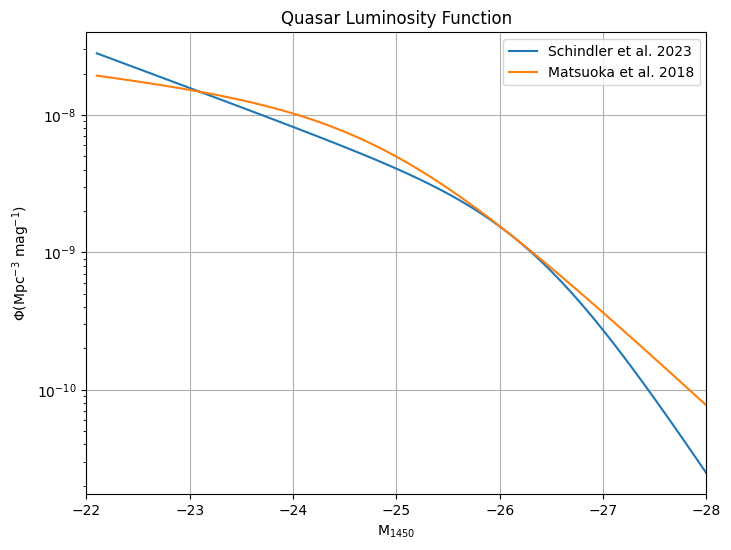

In [10]:
# Plot the QLF
plt.figure(figsize=(8,6))
plt.semilogy(M1450, qlf1.evaluate(M1450, z), label='Schindler et al. 2023')
plt.semilogy(M1450, qlf2.evaluate(M1450, z), label='Matsuoka et al. 2018')
plt.xlabel(r'M$_{1450}$')
plt.ylabel(r'$\Phi$(Mpc$^{-3}$ mag$^{-1}$)')
plt.title('Quasar Luminosity Function')
plt.legend()
plt.grid()
plt.xlim(-22, -28)
plt.show()

In [27]:
# Sample the QSO LF using MCMC
from astropy.cosmology import FlatLambdaCDM
cos = FlatLambdaCDM(H0=70, Om0=0.3)
sky_area = 5000 # in deg^2
lf_sample = qlf1.sample_mcmc((-28, -22), (5.5, 8.0), cos, sky_area)
lf_sample2 = qlf2.sample_mcmc((-28, -22), (5.5, 8.0), cos, sky_area)

[INFO] Integration returned 2549 sources
Acceptance fraction: [0.622  0.6024 0.6118 0.6186 0.6224 0.6024 0.6392 0.6164]
Autocorrelation time: 55 steps


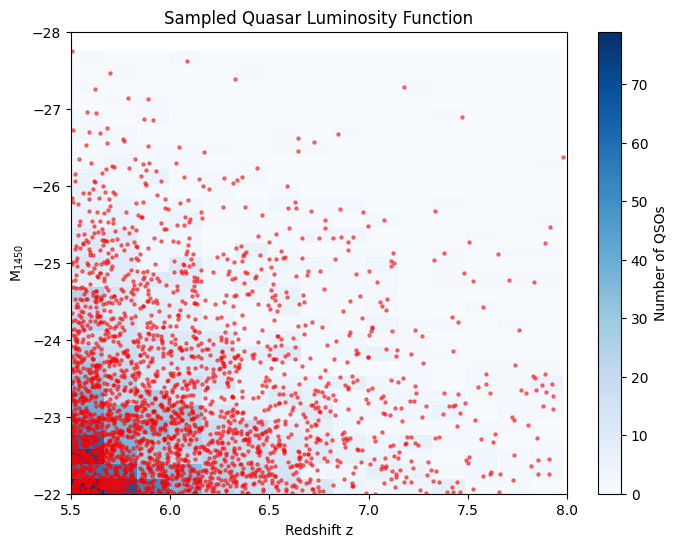

In [31]:
# Plot the sample

plt.figure(figsize=(8,6))
plt.hist2d(lf_sample[1], lf_sample[0], bins=[15, 30], cmap='Blues')
plt.colorbar(label='Number of QSOs')
plt.scatter(lf_sample[1], lf_sample[0], s=5, color='blue', alpha=0.5)
plt.scatter(lf_sample2[1], lf_sample2[0], s=5, color='red', alpha=0.5)
plt.ylabel(r'M$_{1450}$')
plt.xlabel('Redshift z')
plt.title('Sampled Quasar Luminosity Function')
plt.ylim(-22, -28)
plt.xlim(5.5, 8.0)
plt.show()
